In [93]:
import numpy as np
from scipy.fft import fft, ifft
from scipy.io import wavfile
from scipy.signal import convolve, fftconvolve, stft, resample, resample_poly
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import wave

from funcs import from_wav, to_wav, normalize, window_convolve, combine

## Extract WAV files and produce ideal output
Results extracted and produced in this section are full 16 bit audio sampled
at 44.1kHz

### Impulse response

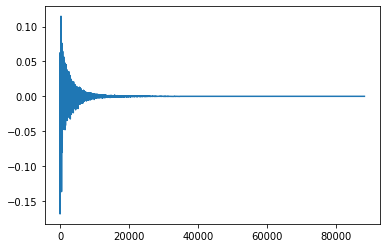

In [94]:
rate, irdata = from_wav("IMreverbs/French 18th Century Salon.wav")
irdata = normalize(irdata)
plt.plot(irdata)

### Music to speakers

/Users/Miguel/Desktop/MIT/fall2021/6.111/project_prototype/funcs.py:22: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, sound_arr = wavfile.read(fname)


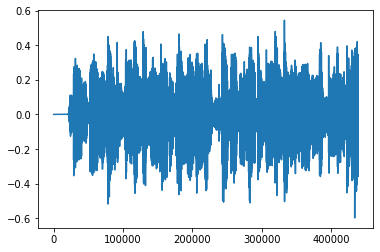

In [95]:
_, speakers = from_wav('all_star.wav')
plt.plot(speakers)

### True convolution

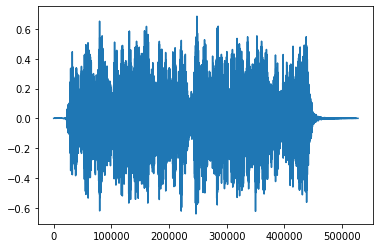

In [96]:
convolved = fftconvolve(irdata, all_star)
to_wav('convolved.wav', rate, convolved)
plt.plot(convolved) 

### Sound from source
This is the sound that we want to extract.

/Users/Miguel/Desktop/MIT/fall2021/6.111/project_prototype/funcs.py:22: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, sound_arr = wavfile.read(fname)


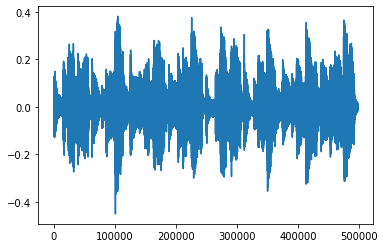

In [97]:
_, source = from_wav('guitar.wav')
plt.plot(source)

### True input
This is the input to the mic

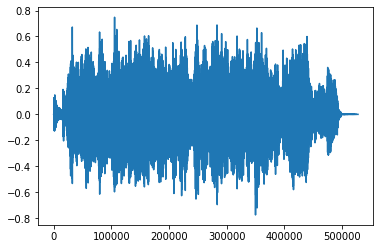

In [98]:
true_input = combine(convolved, source)
to_wav('true_input.wav', rate, true_input)
plt.plot(true_input)

### Clean audio
This is the result of perfectly subtracting the convolved speaker output from
the true input.

Essentially this would be the result if our system worked perfectly.

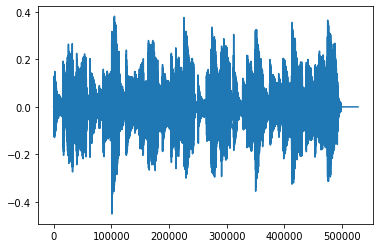

In [99]:
clean = combine(true_input, convolved, mode='subtract')
plt.plot(clean)
to_wav('clean.wav', rate, clean)

## System analysis
Here we will modify our system to produce realistic results. This consists of
trimming/downsampling and using window convolutions.

### Trim/Downsample audio (PLAY AROUND WITH THIS!!!)
Produce a memory manageable version of relevant audio. We can play around
with how we do this in order to reduce memory and timing requirements.

In [100]:
# Trim impulse response to a lower amount of samples
irdata_trim = irdata[:5000]

# Downsample audio
downsample_factor = 2
downsample_rate = rate // downsample_factor
irdata_downsample = resample_poly(irdata, up=1, down=downsample_factor)
speakers_downsample = resample_poly(speakers, up=1, down=downsample_factor)
input_downsample = resample_poly(true_input, up=1, down=downsample_factor)

# Trim the downsampled impulse response
irdata_downsample_trim = irdata_downsample[0:2500]

### Results of convolution

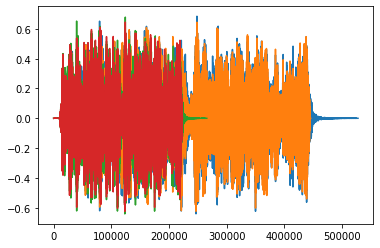

In [101]:
display(plt.plot(convolved))

convolved_trim = window_convolve(speakers, irdata_less)
to_wav('convolved_trim.wav', rate, convolved_trim)
display(plt.plot(convolved_trim))

convolved_downsample = downsample_factor * window_convolve(speakers_downsample, irdata_downsample)
to_wav('convolved_downsample.wav', downsample_rate, convolved_downsample)
display(plt.plot(convolved_downsample))

convolved_downsample_trim = downsample_factor * window_convolve(speakers_downsample, irdata_downsample_trim)
to_wav('convolved_downsample_trim.wav', downsample_rate, convolved_downsample_trim)
display(plt.plot(convolved_downsample_trim))


### Results of subtraction

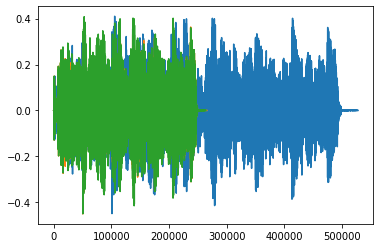

In [102]:
clean_trim = combine(true_input, convolved_trim, mode='subtract')
to_wav('clean_trim.wav', rate, clean_trim)
display(plt.plot(clean_trim))

clean_downsample = combine(input_downsample, convolved_downsample, mode='subtract')
to_wav('clean_downsample.wav', downsample_rate, clean_downsample)
display(plt.plot(clean_downsample))

clean_downsample_trim = combine(input_downsample, convolved_downsample_trim, mode='subtract')
to_wav('clean_downsample_trim.wav', downsample_rate, clean_downsample_trim)
display(plt.plot(clean_downsample_trim))